# Python for Scientific Computing

## Python’s Scientific Ecosystem
In terms of popularity, the big four in the world of scientific Python libraries are

- NumPy

- SciPy

- Matplotlib

- Pandas

For us, there’s another (relatively new) library that will also be essential for numerical computing:

- Numba

Over the next few lectures we’ll see how to use these libraries.

But first, let’s quickly review how they fit together.

- NumPy forms the foundations by providing a basic array data type (think of vectors and matrices) and functions for acting on these arrays (e.g., matrix multiplication).

- SciPy builds on NumPy by adding the kinds of numerical methods that are routinely used in science (interpolation, optimization, root finding, etc.).

- Matplotlib is used to generate figures, with a focus on plotting data stored in NumPy arrays.

- Pandas provides types and functions for empirical work (e.g., manipulating data).

- Numba accelerates execution via JIT compilation — we’ll learn about this soon.

## Vectorisation

There is a clever method called *vectorization* that can be used to speed up high level languages in numerical applications.

The key idea is to send array processing operations in batch to pre-compiled and efficient native machine code.

The machine code itself is typically compiled from carefully optimized C or Fortran.

For example, when working in a high level language, the operation of inverting a large matrix can be subcontracted to efficient machine code that is pre-compiled for this purpose and supplied to users as part of a package.

This clever idea dates back to MATLAB, which uses vectorization extensively.

Vectorization can greatly accelerate many numerical computations (but not all, as we shall see).

Let’s see how vectorization works in Python, using NumPy.

### Operations on Arrays
First, let’s run some imports

In [1]:
import random
import numpy as np
import quantecon as qe

KeyboardInterrupt: 

Next let’s try some non-vectorized code, which uses a native Python loop to generate, square and then sum a large number of random variables:

In [2]:
n = 1_000_000

In [3]:
%%time

y = 0      # Will accumulate and store sum
for i in range(n):
    x = random.uniform(0, 1)
    y += x**2

CPU times: total: 1.03 s
Wall time: 1.45 s


The following vectorized code achieves the same thing.

In [ ]:
%%time

x = np.random.uniform(0, 1, n)
y = np.sum(x**2)

CPU times: total: 31.2 ms
Wall time: 23 ms


### Universal Functions

Many functions provided by NumPy are so-called universal functions — also called ufuncs.

This means that they

- map scalars into scalars, as expected

- map arrays into arrays, acting element-wise

For example, <span style="color:pink">np.cos</span> is a ufunc:

In [ ]:
np.cos(1.0)

0.5403023058681398

In [ ]:
np.cos(np.linspace(0, 1, 3))

array([1.        , 0.87758256, 0.54030231])

By exploiting ufuncs, many operations can be vectorized.

For example, consider the problem of maximizing a function $f$  of two variables $(x,y)$ over the square $[-a,a] \times [-a,a]$.

For $f$ and $a$  let’s choose $$ f(x,y)=\frac {cos(x^2+y^2)}{1+x^2+ y^2}$$ and $$a=3$$

 
Here’s a plot of $f$

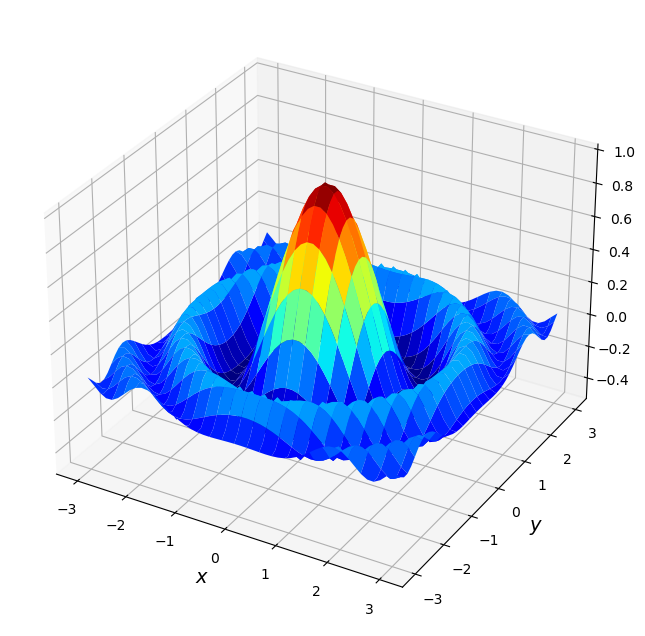

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D 
from matplotlib import cm

def f(x,y):
    return np.cos(x**2 + y**2)/(1 + x**2 + y**2)

xgrid = np.linspace(-3,3,50)
ygrid = xgrid
x, y = np.meshgrid(xgrid,ygrid)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(x,
                y,
                f(x,y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=1,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
ax.set_xlabel('$x$', fontsize=14)
ax.set_ylabel('$y$', fontsize=14)
plt.show()

To maximize it, we’re going to use a naive grid search:

1. Evaluate $f$  for all $(x,y)$ in a grid on the square.

2. Return the maximum of observed values.

The grid will be

In [24]:
grid = np.linspace(-3, 3, 1000)

Here’s a non-vectorized version that uses Python loops.

In [25]:
%%time

m = -np.inf

for x in grid:
    for y in grid:
        z = f(x, y)
        if z > m:
            m = z

CPU times: total: 2.72 s
Wall time: 2.84 s


And here’s a vectorized version

In [26]:
%%time

x, y = np.meshgrid(grid, grid)
np.max(f(x, y))

CPU times: total: 46.9 ms
Wall time: 54.9 ms


0.9999819641085747